In [1151]:
# library & dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")
# Import label encoder 
from sklearn import preprocessing

#Load the Excel data into a DataFrame object
excel_data_df = pd.ExcelFile('V02Max_Combined.xlsx')
temp_data = pd.read_excel('merged_athletes_data.xlsx')

sheet_kayaking = pd.read_excel(excel_data_df, sheet_name = 'Kayaking')
sheet_Athletes = pd.read_excel(excel_data_df, sheet_name ='Athletes')
sheet_Triathlon = pd.read_excel(excel_data_df, sheet_name ='Triathlon')
sheet_Fencing = pd.read_excel(excel_data_df, sheet_name ='Fencing')

#global variables
#-----------------------
#grouping the data and calculating VO2Sum for each athlete
df = temp_data.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2_Sum')

#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, sheet_Athletes[['ID','age','Weight','Height','sport','First Name','Last Name']], on='ID', how='inner')

#calculating VO2Max
df1['VO2Max'] = df1['VO2_Sum']/df1['Weight']
print(df1.head())
#------------------------------

   ID      VO2_Sum  age  Weight  Height    sport First Name Last Name  \
0   1  2298.775092   15    53.7     161  fencing     Olivia  Martinez   
1   2  2171.152256   15    56.2     162  fencing      Ethan  Reynolds   
2   3  6266.538536   16    89.9     191  fencing    Jackson    Harper   
3   4  5889.725663   16    76.5     180  fencing       Liam   Sanchez   
4   5  6627.133058   17    76.4     186  fencing        Ava  Thompson   

      VO2Max  
0  42.807730  
1  38.632602  
2  69.705657  
3  76.989878  
4  86.742579  


42. What was the difference in heart rate between warm up and GET for athlete 1

43. Create a pivot table that shows count of patients within each age group and sport

In [174]:
# Create a pivot table Using Aggfunc 'count'
pivot_table = pd.pivot_table(sheet_Athletes, values='ID', index='sport', columns='age', aggfunc='count')
pivot_table.style.format({'ID':'{:.0f}'}) 
print(pivot_table)

age         12   13   14   15   16   17   18
sport                                       
fencing    NaN  NaN  2.0  4.0  2.0  2.0  NaN
kayak      NaN  2.0  NaN  NaN  1.0  NaN  3.0
triathlon  2.0  NaN  NaN  NaN  NaN  NaN  NaN


44. Display a  distrubution chart of MAX V02 for all athletes

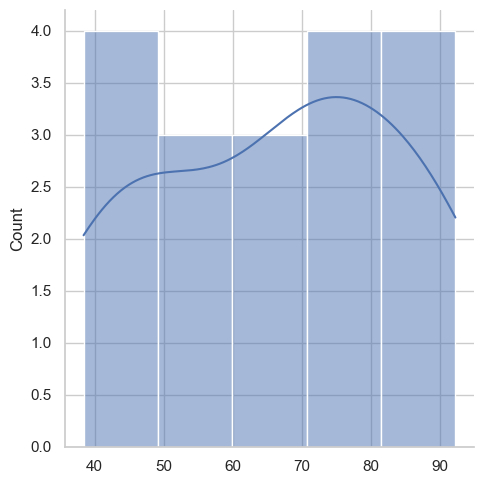

In [1127]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.displot(lst_VO2_max,kde=True,bins=5)


45. Create a dummy array with no data with a size of 15.

In [343]:
dumArr = np.array(15)
print("Dummy array with no data with size :",dumArr)

Dummy array with no data with size : 15


46. How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

47. Convert ' sport' into a numeric field through Label encoding

In [332]:
#sheet_Athletes['sport'].unique() 
print("original sport colum type ",sheet_Athletes['sport'].unique())
print("sport data \n",sheet_Athletes['sport'])
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'sport'. 
sheet_Athletes['sport']= label_encoder.fit_transform(sheet_Athletes['sport']) 
#sheet_Athletes['sport'].unique() 
print("after conversion to numeric",sheet_Athletes['sport'].unique())
print("sport data\n",sheet_Athletes['sport'])

original sport colum type  ['fencing' 'kayak' 'triathlon']
sport data 
 0       fencing
1       fencing
2       fencing
3       fencing
4       fencing
5       fencing
6       fencing
7       fencing
8       fencing
9       fencing
10        kayak
11        kayak
12        kayak
13        kayak
14        kayak
15        kayak
16    triathlon
17    triathlon
Name: sport, dtype: object
after convertion to numeric [0 1 2]
sport data
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    2
Name: sport, dtype: int64


48. What was the average age of the athletes?

In [660]:
print(f"average age of the athletes is {sheet_Athletes['age'].mean():.2f} years")

average age of the athletes is 15.22 years


49. Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [1257]:
average_IBI = sheet_Fencing['RR'].mean()

In [ ]:
50. Create a violin chart using any 2 columns in the dataset 

/var/folders/7x/7vy0hrh14wq27nhstwnmyky40000gn/T/ipykernel_1369/2984711188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x= 'ID',y= 'power' ,palette="pastel")


<Axes: xlabel='ID', ylabel='power'>

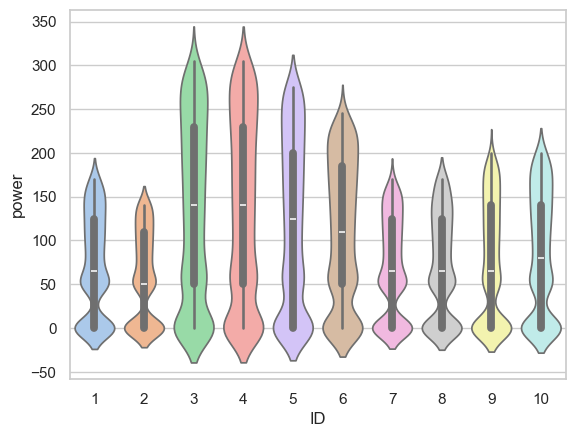

In [1024]:
# use to set style of background of plot
sns.set(style = 'whitegrid')
df = sheet_Fencing[['ID','power']]
sns.violinplot(data = df, x= 'ID',y= 'power' ,palette="pastel")

51. List every athlete’s V02 ml/kg 

In [1155]:
lst_VO2_max = df1['VO2Max'].tolist()
print("list of VO2max\n")

for id in lst_VO2_max:
    print(f"{id:.2f} (ml/kg) ")

list of VO2max

42.81 (ml/kg) 
38.63 (ml/kg) 
69.71 (ml/kg) 
76.99 (ml/kg) 
86.74 (ml/kg) 
71.68 (ml/kg) 
38.40 (ml/kg) 
44.82 (ml/kg) 
49.70 (ml/kg) 
55.12 (ml/kg) 
89.59 (ml/kg) 
92.26 (ml/kg) 
90.76 (ml/kg) 
54.87 (ml/kg) 
66.94 (ml/kg) 
69.66 (ml/kg) 
73.79 (ml/kg) 
81.21 (ml/kg) 


53. 

In [654]:
phonebook ={ 
    "john" :938477566,
    "Jack":938377264,
    "Jill":947662781
}
print("The phone no of Jill is :",phonebook["Jill"])

The phone no of Jill is : 947662781


54. Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

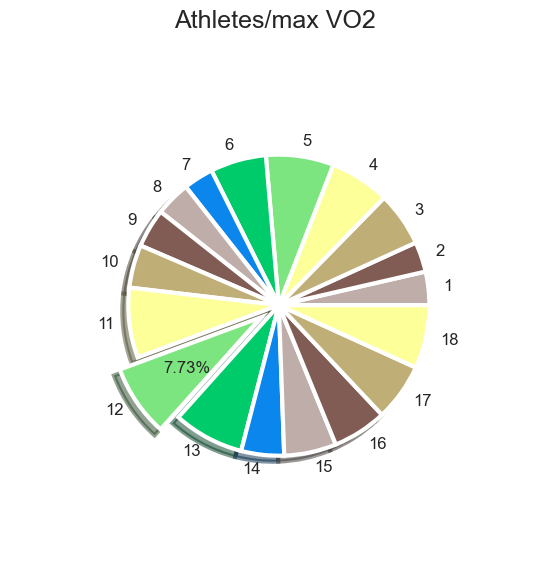

In [1255]:
id = df1['ID'].iloc[df1['VO2Max'].idxmax()]
#print("heighest VO2max",id)
fig, ax = plt.subplots(figsize=(6, 6))
explode = (0,  0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0,0)   
patches, texts, autotexts = plt.pie(x=df1['VO2Max'],explode = explode ,
        labels= df1['ID'], 
        radius=.7,
        frame=False,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        colors= sns.color_palette("terrain_r", 7),
       textprops={'size': 12},
       shadow = True,
      autopct='%1.2f%%'
       )
ax.set_title('Athletes/max VO2 ', fontsize=18)
plt.tight_layout()
#patches, texts, autotexts = plt.pie(x=df1['VO2Max'], labels=df1['ID'],explode = explode ,shadow = True,autopct='%1.2f%%',)
# Iterate over slices
for idx, wedge in enumerate(patches): 
    # Hide all slices except the highest VO2max
    if (idx != 11):
        #wedge.set_visible(False)
        #texts[idx].set_visible(False)
        autotexts[idx].set_visible(False)
      

plt.pie(count, 
        labels=labels_sport,
        labeldistance=1.1,
        autopct=lambda x: '{:.0f}'.format(x * (data_Athletes['sport'].count()) / 100),
        textprops={'fontsize':10},
        colors=sns.color_palette('Set2'),
        startangle=90)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()

55. Using a for loop iterate through HR for all triathlon and display all details of the athlete with the highest heart rate

In [610]:
# Create an empty list to store HR data
HR_list =[]

#reading RR column from Triathlon dataframe
list = sheet_Triathlon.iloc[:] 

# Converting DataFrame to list using values property
RR_list = list['RR'].tolist()

# printing original list
#print("The original list is : \n"+ str(RR_list))

# Iterate over column RR
for i in RR_list:
    
    #R-R Interval Heart Rate Formula (HR=60/RR/1000) unit BPM
   temp_list=60/(i/1000) 
   HR_list.append(temp_list)
    
# Max value in HR list
print(f"The highest heart rate value is: {max(HR_list):.2f}")

id = HR_list.index(max(HR_list))

#This will return the entire row of max value HR index
print ("Triathlon_data[{}]: \n".format(id), list.iloc[id])



The highest heart rate value is: 197.37
Triathlon_data[4152]: 
 ID        18.000000
time     628.644000
RR       304.000000
VO2        1.909147
power    170.000000
Name: 4152, dtype: float64


56. Display a histogram to show distribution of athletes by sport.

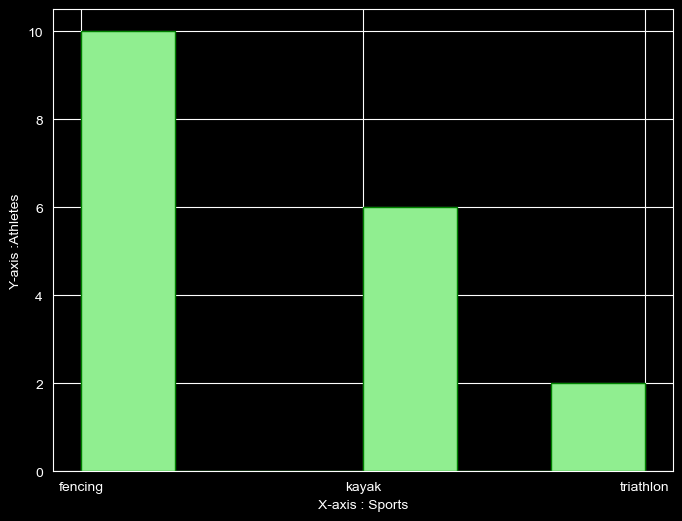

In [272]:
#Ids = sheet_Athletes['ID']
Sports = sheet_Athletes['sport']
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
#create histogram
plt.hist(Sports,"auto",color='lightgreen',edgecolor="g",align='mid')

# Add x-axis and y-axis titles
plt.xlabel('X-axis : Sports')
plt.ylabel('Y-axis :Athletes')
# Display the plot
plt.show()

57. get the first letter of last name of students using for loops and RegEX

In [549]:
list = sheet_Athletes.iloc[:] 
# Converting DataFrame to list using values property
last_name_list = list['Last Name'].tolist()

# Iterate over first 50 rows
for rows in last_name_list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'^[A-za-z]{1}',rows)
   print("first letter ", regex_result ,"of athletes ", rows)

first letter  <re.Match object; span=(0, 1), match='M'> of athletes  Martinez
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Reynolds
first letter  <re.Match object; span=(0, 1), match='H'> of athletes  Harper
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Sanchez
first letter  <re.Match object; span=(0, 1), match='T'> of athletes  Thompson
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Rodriguez
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Simmons
first letter  <re.Match object; span=(0, 1), match='B'> of athletes  Bennett
first letter  <re.Match object; span=(0, 1), match='P'> of athletes  Price
first letter  <re.Match object; span=(0, 1), match='J'> of athletes  Jordan
first letter  <re.Match object; span=(0, 1), match='G'> of athletes  Griffin
first letter  <re.Match object; span=(0, 1), match='D'> of athletes  Dixon
first letter  <re.Match object; span=(0, 1), match='C'> of athletes  Carpente

59. Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [1147]:

# find maximum value of athletes height
print(f"The tallest athletes's height is {maxHeight} \n {df1[['sport','VO2Max']].iloc[df1['Height'].idxmax()]}")


The tallest athletes's height is 191 
 sport       fencing
VO2Max    69.705657
Name: 2, dtype: object


In [ ]:
60.get the last letter of athletes last names using RegEX

In [545]:
list_of_50 = sheet_Athletes.iloc[:50] 
# Converting DataFrame to list using values property
list = list_of_50['Last Name'].tolist()

# Iterate over first 50 rows
for rows in list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'[A-za-z]{1}\Z',rows)
   print("last letter ", regex_result ,"of athletes ", rows)

last letter  <re.Match object; span=(7, 8), match='z'> of athletes  Martinez
last letter  <re.Match object; span=(7, 8), match='s'> of athletes  Reynolds
last letter  <re.Match object; span=(5, 6), match='r'> of athletes  Harper
last letter  <re.Match object; span=(6, 7), match='z'> of athletes  Sanchez
last letter  <re.Match object; span=(7, 8), match='n'> of athletes  Thompson
last letter  <re.Match object; span=(8, 9), match='z'> of athletes  Rodriguez
last letter  <re.Match object; span=(6, 7), match='s'> of athletes  Simmons
last letter  <re.Match object; span=(6, 7), match='t'> of athletes  Bennett
last letter  <re.Match object; span=(4, 5), match='e'> of athletes  Price
last letter  <re.Match object; span=(5, 6), match='n'> of athletes  Jordan
last letter  <re.Match object; span=(6, 7), match='n'> of athletes  Griffin
last letter  <re.Match object; span=(4, 5), match='n'> of athletes  Dixon
last letter  <re.Match object; span=(8, 9), match='r'> of athletes  Carpenter
last letter